<a href="https://colab.research.google.com/github/Adeolujoseph/Convolutional-Neural-Network-with-MNIST-Hand-written-dataset/blob/main/mnist_pytorch_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

In [2]:
import torch
from torchvision import datasets, transforms

# Define a transform to convert the data to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load the training set
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Load the test set
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for training and testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


100%|██████████| 9912422/9912422 [00:00<00:00, 149458834.35it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41118701.23it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46854363.00it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17787608.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:


# Define the CNN Model
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)



In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Assuming you have loaded the data (trainloader and testloader) and defined the model

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []

# Training loop
for epoch in range(11):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    print(f'Epoch [{epoch+1}] Avg. Loss: {avg_train_loss:.4f}')

    # Reset running loss for next epoch
    running_loss = 0.0

    # Evaluate on the test set
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / len(testloader)
    test_losses.append(avg_test_loss)

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Epoch [1] Avg. Loss: 0.1174
Accuracy of the network on the 10000 test images: 98.18%
Epoch [2] Avg. Loss: 0.0457
Accuracy of the network on the 10000 test images: 98.7%
Epoch [3] Avg. Loss: 0.0327
Accuracy of the network on the 10000 test images: 98.99%
Epoch [4] Avg. Loss: 0.0245
Accuracy of the network on the 10000 test images: 98.97%
Epoch [5] Avg. Loss: 0.0200
Accuracy of the network on the 10000 test images: 98.82%
Epoch [6] Avg. Loss: 0.0168
Accuracy of the network on the 10000 test images: 99.07%
Epoch [7] Avg. Loss: 0.0138
Accuracy of the network on the 10000 test images: 98.99%
Epoch [8] Avg. Loss: 0.0122
Accuracy of the network on the 10000 test images: 98.98%
Epoch [9] Avg. Loss: 0.0114
Accuracy of the network on the 10000 test images: 98.65%
Epoch [10] Avg. Loss: 0.0125
Accuracy of the network on the 10000 test images: 98.93%
Epoch [11] Avg. Loss: 0.0096
Accuracy of the network on the 10000 test images: 98.94%


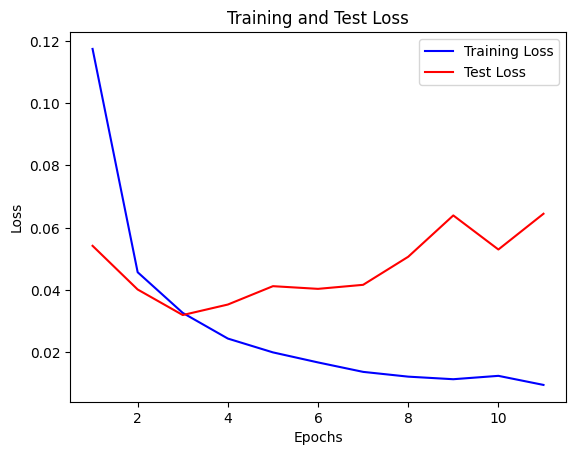

In [5]:
import matplotlib.pyplot as plt

# Assuming you have lists 'train_losses' and 'test_losses' that store the losses during training
epochs = range(1, len(train_losses) + 1)  # Assuming you're tracking losses per epoch

# Plotting the training and test losses
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss', color='red')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
